# CMPUT 655 - Assignment 2
## Lucas Cruz

The algorithms for value iteration/evaluation were implemented in the module "algos" in the package gym_gridworlds. [See here](../gym_gridworlds/algos/policy_evaluation.py)

Additional plotting code was implemented in the "utils" module. [See here](../gym_gridworlds/utils/plotting.py)

The discussions were included in the PDF submitted.

In [1]:
import numpy as np
from gym_gridworlds.algos.policy_evaluation import PolicyEvaluation
from gym_gridworlds.utils.env_specs import get_env_specs
from gym_gridworlds.utils.plotting import plot_policy, plot_values


ENV_NAME = "Gym-Gridworlds/Penalty-3x3-v0"
GAMMAS = [0.01, 0.5, 0.99]
INITIALIZATION_VALUES = [-10, 0, 10]
THETA = 0.01
POLICY = np.array(
    [
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
    ]
)

In [2]:
R, P, T, n_states, n_actions = get_env_specs(name=ENV_NAME)

v_pi_results = {gamma: {init_value: {} for init_value in INITIALIZATION_VALUES} for gamma in GAMMAS}
q_pi_results = {gamma: {init_value: {} for init_value in INITIALIZATION_VALUES} for gamma in GAMMAS}

for gamma in GAMMAS:
    for init_value in INITIALIZATION_VALUES:
        evaluator = PolicyEvaluation(
            gamma=gamma,
            policy=POLICY,
            rewards=R,
            transitions=P,
            terminal=T,
            n_states=n_states,
            n_actions=n_actions,
            initialization=init_value
        )
        values, errors = evaluator.v_pi_iterative_form(threshold=THETA)
        v_pi_results[gamma][init_value] = {
            'values': values,
            'errors': errors
        }

        evaluator._reset()
        values, errors = evaluator.q_pi_iterative_form(threshold=THETA)
        q_pi_results[gamma][init_value] = {
            'values': values,
            'errors': errors
        }

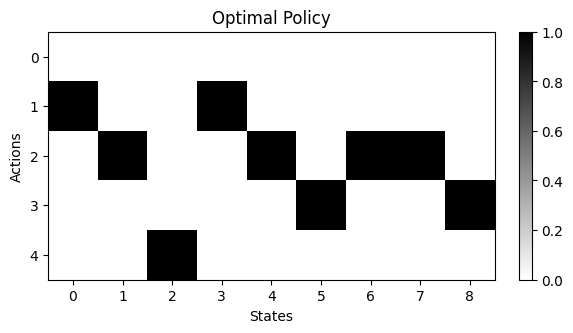

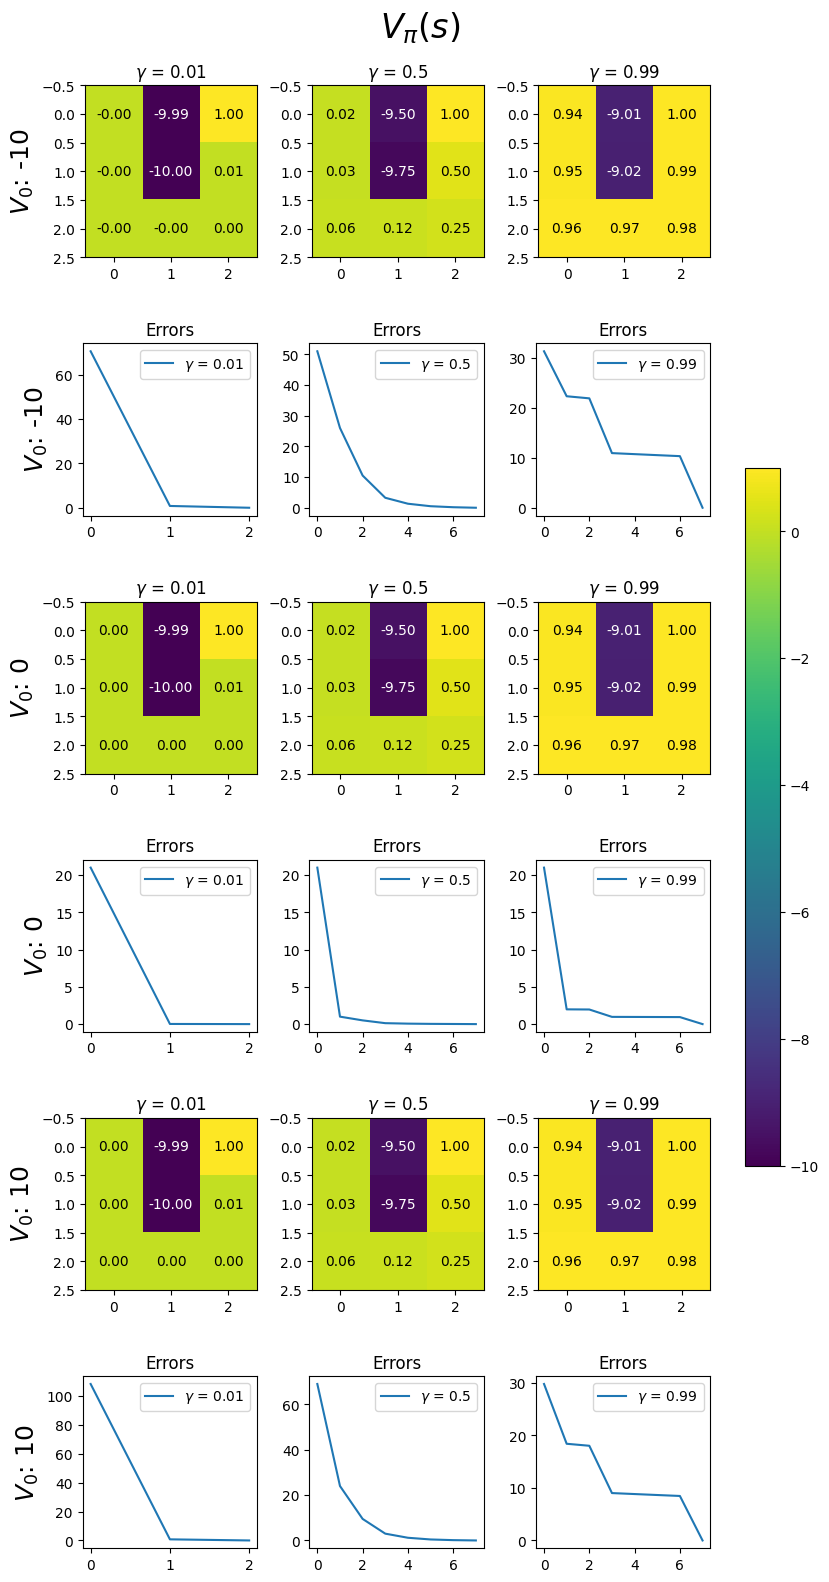

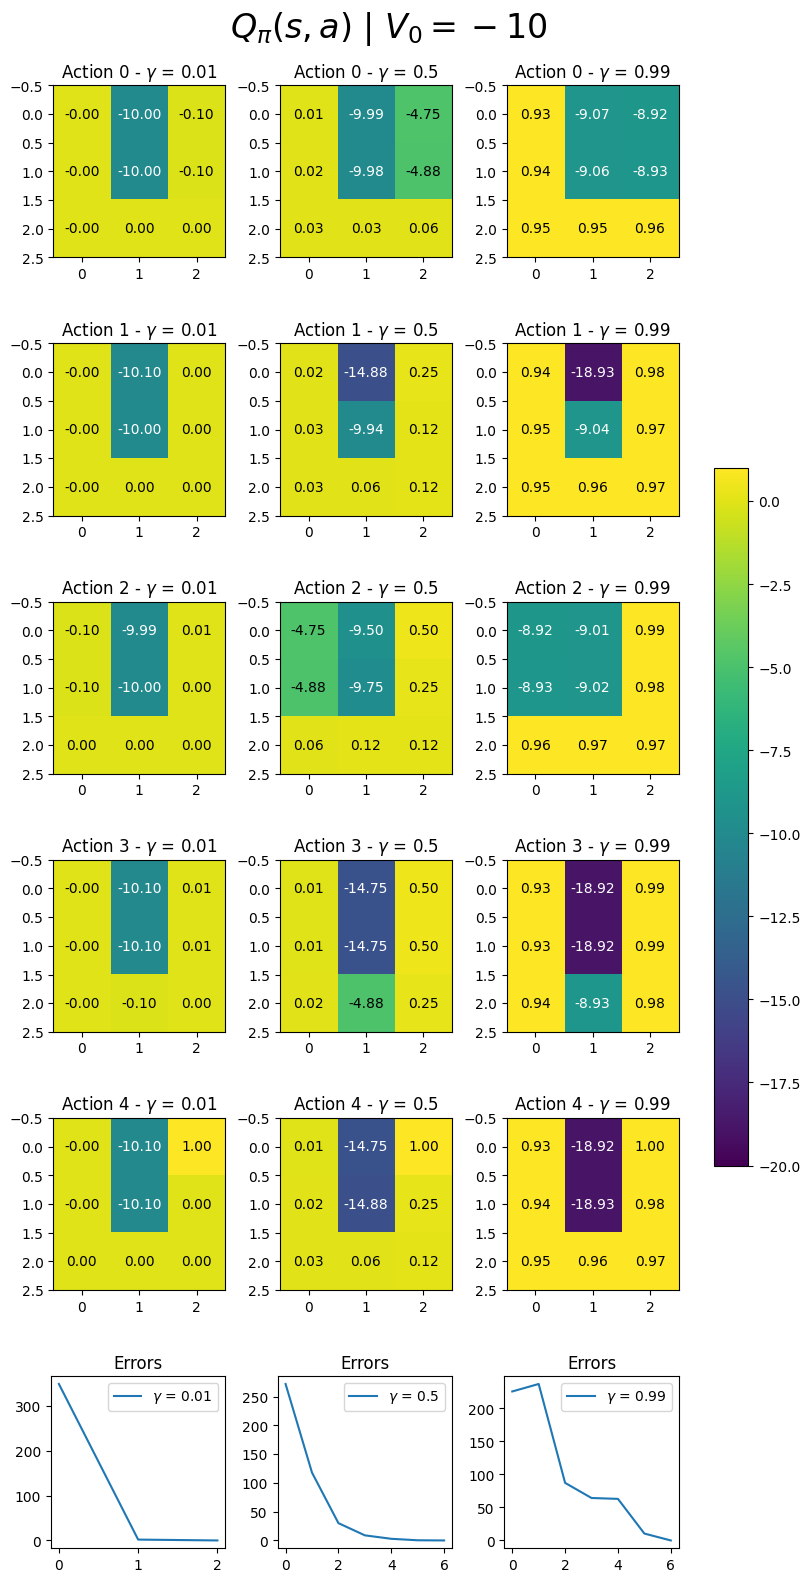

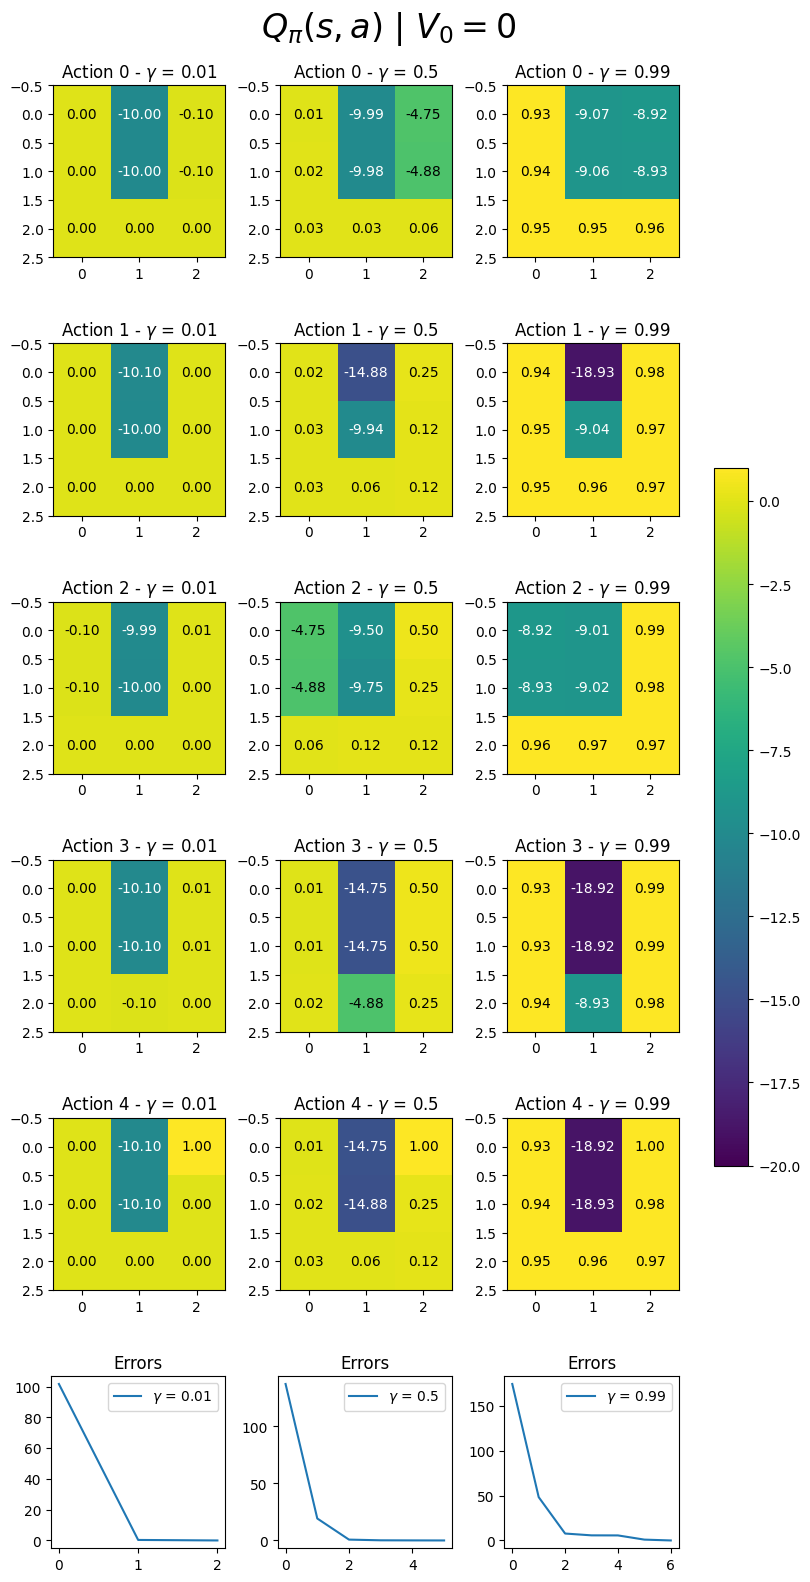

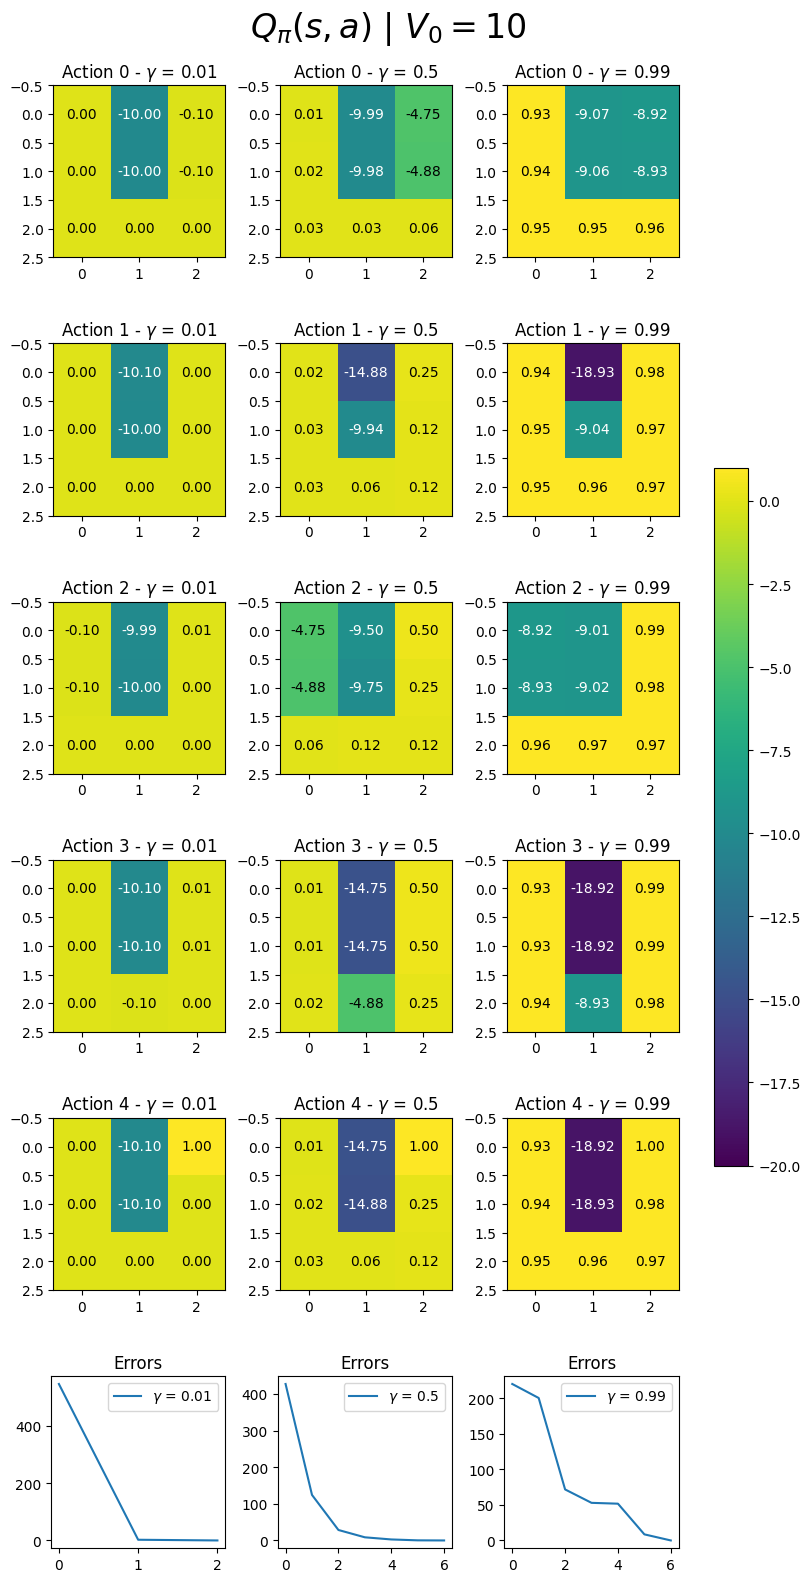

In [3]:
plot_policy(policy=POLICY, title="Optimal Policy")
plot_values(v_pi_results, is_state_values=True, title="$V_\pi(s)$", norm_range=(-10,1))
plot_values(q_pi_results, is_state_values=False, title="$Q_\pi(s,a)$", norm_range=(-20,1))